In [61]:
import configparser
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN, OPTICS, SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

config = configparser.ConfigParser()
config.read("../config.ini")

from data.data_util import cluster_data, sample_data, plot_difference_gender_age, categorize_age, plot_cluster_analysis
import pandas as pd

In [62]:
dataset = 'chexpert'
id = "41a2a54f-695b-479e-b5e0-81e5885ef07d"

In [63]:
X = np.load(f'/Users/dilermando/dev/Fairness/data/dataset/experiment/{id}/tsne_{dataset}_{id}.npy')
X.shape

(45046, 2)

db = DBSCAN(eps=4.5, min_samples=150).fit(X)

Estimated number of clusters: 15
Estimated number of noise points: 14785


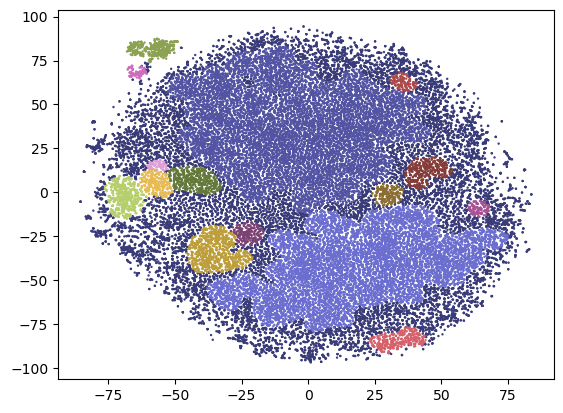

In [64]:
db = DBSCAN(eps=4, min_samples=120).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters_}")
print(f"Estimated number of noise points: {n_noise_}")

plt.scatter(X[:, 0], X[:, 1], c=labels, s=0.5, cmap='tab20b')
plt.show()

# Sample data

In [65]:
data = pd.read_csv(f"{config[dataset]['labels']}")
sex_map = {'Female': 'Female', 'Male': 'Male'}
data['Patient Gender'] = data['Sex'].map(sex_map)

data = categorize_age(data, column_age='Age')
data = cluster_data(data, id, dataset_name=dataset, pca=False, tsne=True, cluster_type='spectral', labels_tsne=labels)
_, sampled_tsne = sample_data(data, 0.3, n_clusters_, type='cluster')
sampled_random = data.sample(n=len(sampled_tsne))

In [66]:
len(sampled_tsne), len(sampled_random)

(7757, 7757)

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarni

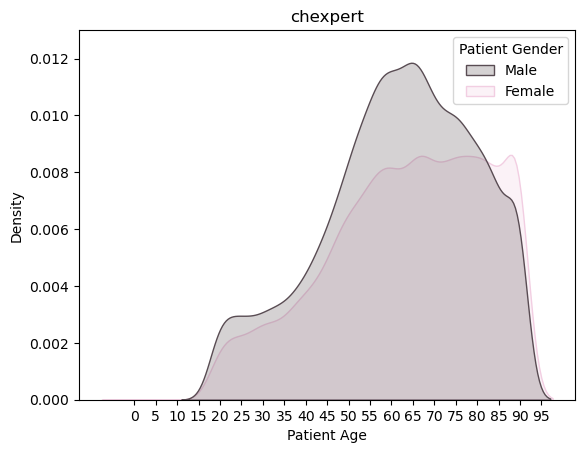

In [67]:
plot_difference_gender_age(
    data,
    dir=f"../data/dataset/experiment/{id}/gender_age_tsne.jpg",
    title=f"{dataset}",
    save=False,
    palette=['#594C53', '#F2CEE2'],
    column_age='Age'
    )

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarni

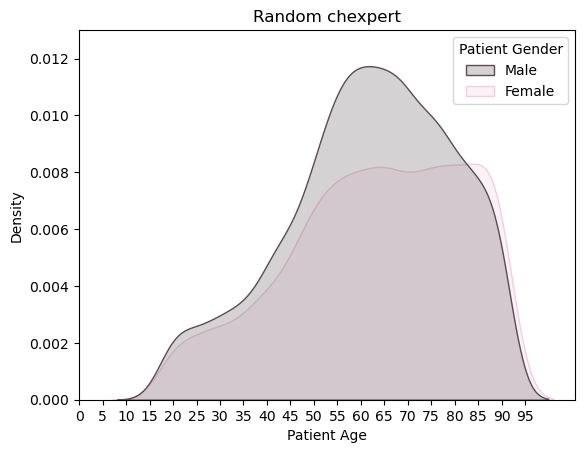

In [68]:
plot_difference_gender_age(
    sampled_random,
    dir=f"../data/dataset/experiment/{id}/gender_age_tsne.jpg",
    title=f"Random {dataset}",
    save=False,
    palette=['#594C53', '#F2CEE2'],
    column_age='Age'
    )

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarni

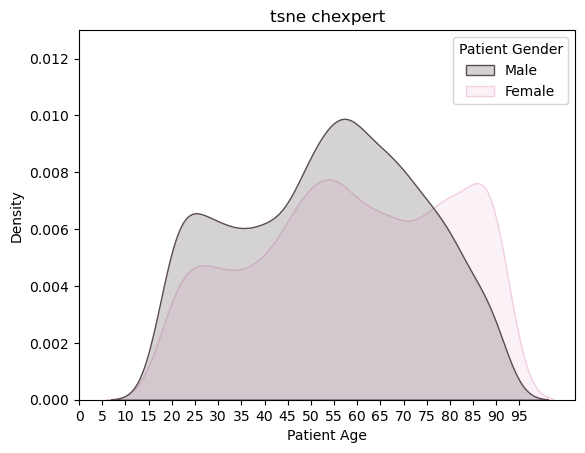

In [69]:
plot_difference_gender_age(
    sampled_tsne,
    dir=f"../data/dataset/experiment/{id}/gender_age_tsne.jpg",
    title=f"tsne {dataset}",
    save=False,
    palette=['#594C53', '#F2CEE2'],
    column_age='Age')

In [70]:
sampled_tsne['Sex'].value_counts(normalize=True) * 100

Sex
Male      52.365605
Female    47.634395
Name: proportion, dtype: float64

In [71]:
sampled_random['Sex'].value_counts(normalize=True) * 100

Sex
Male      54.582957
Female    45.417043
Name: proportion, dtype: float64

In [72]:
sampled_random.groupby('Patient Age Categorized').size()

Patient Age Categorized
15-30     461
30-45     868
45-60    1900
60-75    2253
75-90    1895
90+       380
dtype: int64

In [73]:
sampled_random.groupby('Patient Age Categorized').size().max(), sampled_random.groupby('Patient Age Categorized').size().min()

(2253, 380)

In [74]:
sampled_tsne.groupby('Patient Age Categorized').size()

Patient Age Categorized
15-30    1069
30-45    1263
45-60    1941
60-75    1720
75-90    1409
90+       355
dtype: int64

In [75]:
sampled_tsne.groupby('Patient Age Categorized').size().max(), sampled_tsne.groupby('Patient Age Categorized').size().min()

(1941, 355)

# Cluster analysis

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


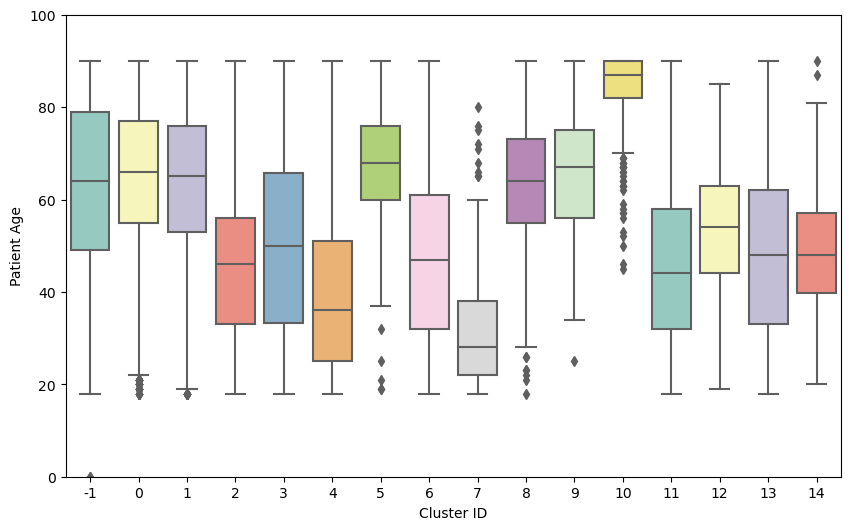

In [76]:
plot_cluster_analysis(data, column_age="Age")

<Axes: xlabel='cluster_id_tsne'>

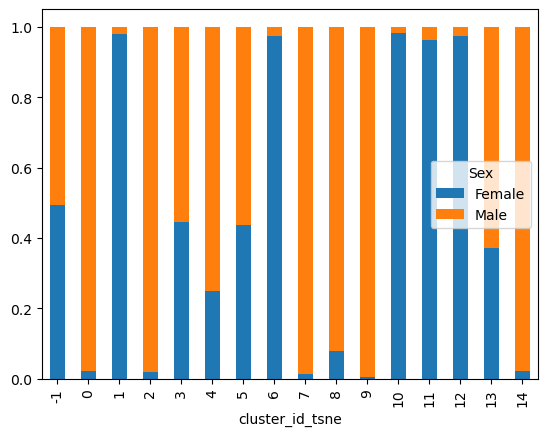

In [77]:
grouped = data.groupby(['cluster_id_tsne', 'Sex']).size().unstack().fillna(0)
grouped_percentage = grouped.divide(grouped.sum(axis=1), axis=0)

# Criando um gráfico de barras empilhado
grouped_percentage.plot(kind='bar', stacked=True)

In [78]:
grouped_percentage

Sex,Female,Male
cluster_id_tsne,,
-1,0.492729,0.507271
0,0.021962,0.978038
1,0.978616,0.021384
2,0.020725,0.979275
3,0.444840,0.555160
4,0.250399,0.749601
5,0.438247,0.561753
6,0.974335,0.025665
7,0.013812,0.986188


<Axes: xlabel='cluster_id_tsne'>

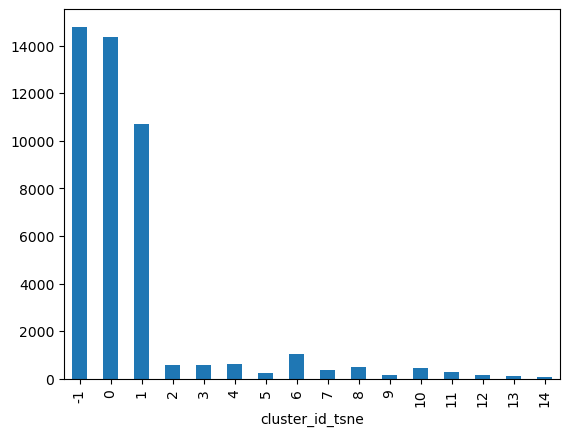

In [79]:
data.groupby('cluster_id_tsne').size().plot(kind='bar')

In [80]:
#order
data.groupby('cluster_id_tsne').size().sort_values(ascending=False)

cluster_id_tsne
-1     14785
 0     14343
 1     10709
 6      1052
 4       627
 2       579
 3       562
 8       502
 10      444
 7       362
 11      277
 5       251
 9       181
 12      155
 13      121
 14       96
dtype: int64